In [1]:
import numpy as np
import pandas as pd
import h5py
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt

In [2]:
def load_data():
    """
    This function imports the cats-vs-noncat data set from .h5 file
    
    Inputs: None
    Returns: X_train, y_train, X_test, y_test
    """
    
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    X_train = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T /255.
    X_test = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T /255.
    
    return X_train, train_set_y_orig, X_test, test_set_y_orig

In [3]:
# Get the data
X_train, y_train, X_test, y_test = load_data()

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (12288, 209)
y_train.shape: (1, 209)


In [4]:
imgs = X_train.T.reshape((209, 64, 64, 3))

''

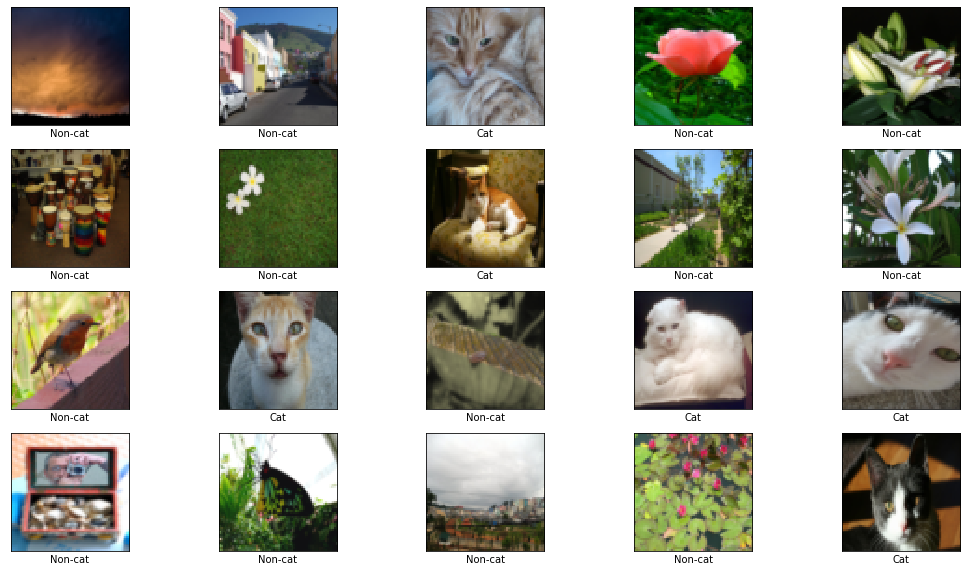

In [5]:
# Plot 20 photos from the training set
plt.figure(figsize=(18,10))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[i], cmap=plt.cm.binary)
    if y_train[0,i] == 1.:
        plt.xlabel("Cat")
    else:
        plt.xlabel("Non-cat")
    
;

In [6]:
model = keras.Sequential([
    tfl.Dense(20, activation='relu'),
    tfl.Dense(7, activation='relu'),
    tfl.Dense(5, activation='relu'),
    tfl.Dense(2, activation='sigmoid')
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
model.fit(X_train.T, y_train.T, epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7940 - accuracy: 0.4586
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.5902
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5858 - accuracy: 0.6679
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6688 - accuracy: 0.6132
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5554 - accuracy: 0.7190
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6047 - accuracy: 0.7373
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6212 - accuracy: 0.6441
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5487 - accuracy: 0.7152
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4751 - accuracy: 0.7819
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.7125
Epoch 11/50
7/7 [======================

In [9]:
model.evaluate(X_test.T, y_test.T)

2/2 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.7200


[0.7113680839538574, 0.7200000286102295]